In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import scipy.stats as stats

os.getcwd()

'/homes/iws/bhimar/cse481ds-mental-health/notebooks/county_level'

In [6]:
df = pd.read_csv('../../data/processed_data/full_df.csv')
df.head()

State FIPS Code  County FIPS Code  5-digit FIPS Code State Abbreviation  \
0                1                 1               1001                 AL   
1                1                 3               1003                 AL   
2                1                 9               1009                 AL   
3                1                15               1015                 AL   
4                1                31               1031                 AL   

             Name  Release Year  County Ranked (Yes=1/No=0)  \
0  Autauga County          2010                         1.0   
1  Baldwin County          2010                         1.0   
2   Blount County          2010                         1.0   
3  Calhoun County          2010                         1.0   
4   Coffee County          2010                         1.0   

   Premature death raw value  Premature death numerator  \
0                     9778.1                      670.0   
1                     8221.7                     2148.0   
2                     8929.7                      787.0   
3                    11526.2                     2035.0   
4                     9004.7                      645.0   

   Premature death denominator  ...  April Average Precipitation  \
0                     137881.0  ...                         2.17   
1                     449589.0  ...                         2.31   
2                     155580.0  ...                         5.66   
3                     313874.0  ...                         3.73   
4                     126516.0  ...                         1.88   

   May Average Precipitation  June Average Precipitation  \
0                       5.72                        2.47   
1                       6.31                        4.94   
2                       7.47                        3.39   
3                       6.46                        2.70   
4                       4.71                        3.84   

   July Average Precipitation  August Average Precipitation  \
0                        3.38                          4.38   
1                        4.08                          9.38   
2                        3.55                          4.31   
3                        4.00                          3.78   
4                        2.78                          6.30   

   September Average Precipitation  October Average Precipitation  \
0                             1.38                           3.14   
1                             2.24                           2.06   
2                             1.23                           3.12   
3                             1.55                           2.96   
4                             2.41                           1.38   

   November Average Precipitation  December Average Precipitation  RUCC  
0                            5.01                            1.89   2.0  
1                            6.11                            2.19   3.0  
2                            4.62                            2.07   1.0  
3                            3.06                            2.24   3.0  
4                            3.71                            2.03   4.0  

[5 rows x 543 columns]

In [20]:
identifying_fields = ['State Abbreviation', 'Name', 'Release Year']
independent_fields = ['Unemployment raw value', 'Median household income raw value', 'High school graduation raw value', 'Some college raw value', 'Average Temperature','Average Precipitation']
dependent_fields = ['Poor mental health days raw value', 'Crude Rate']
filtered_df = df[identifying_fields + independent_fields + dependent_fields]
filtered_df.head(n=20)

State Abbreviation               Name  Release Year  \
0                  AL     Autauga County          2010   
1                  AL     Baldwin County          2010   
2                  AL      Blount County          2010   
3                  AL     Calhoun County          2010   
4                  AL      Coffee County          2010   
5                  AL     Colbert County          2010   
6                  AL     Cullman County          2010   
7                  AL        Dale County          2010   
8                  AL      DeKalb County          2010   
9                  AL      Elmore County          2010   
10                 AL      Etowah County          2010   
11                 AL     Houston County          2010   
12                 AL   Jefferson County          2010   
13                 AL  Lauderdale County          2010   
14                 AL    Lawrence County          2010   
15                 AL         Lee County          2010   
16                 AL     Madison County          2010   
17                 AL      Mobile County          2010   
18                 AL  Montgomery County          2010   
19                 AL      Morgan County          2010   

    Unemployment raw value  Median household income raw value  \
0                    0.046                                NaN   
1                    0.041                                NaN   
2                    0.041                                NaN   
3                    0.051                                NaN   
4                    0.043                                NaN   
5                    0.058                                NaN   
6                    0.043                                NaN   
7                    0.048                                NaN   
8                    0.052                                NaN   
9                    0.046                                NaN   
10                   0.053                                NaN   
11                   0.043                                NaN   
12                   0.048                                NaN   
13                   0.051                                NaN   
14                   0.058                                NaN   
15                   0.046                                NaN   
16                   0.037                                NaN   
17                   0.051                                NaN   
18                   0.053                                NaN   
19                   0.047                                NaN   

    High school graduation raw value  Some college raw value  \
0                           0.715190                     NaN   
1                           0.670437                     NaN   
2                           0.730135                     NaN   
3                           0.649849                     NaN   
4                           0.783520                     NaN   
5                           0.684751                     NaN   
6                           0.739267                     NaN   
7                           0.641390                     NaN   
8                           0.616322                     NaN   
9                           0.630074                     NaN   
10                          0.716294                     NaN   
11                          0.626478                     NaN   
12                          0.633819                     NaN   
13                          0.705382                     NaN   
14                          0.731707                     NaN   
15                          0.682725                     NaN   
16                          0.720911                     NaN   
17                          0.603184                     NaN   
18                          0.487907                     NaN   
19                          0.649869                     NaN   

    Average Temperature  Average Precipitation  \
0             63.591667

<Figure size 864x432 with 0 Axes>

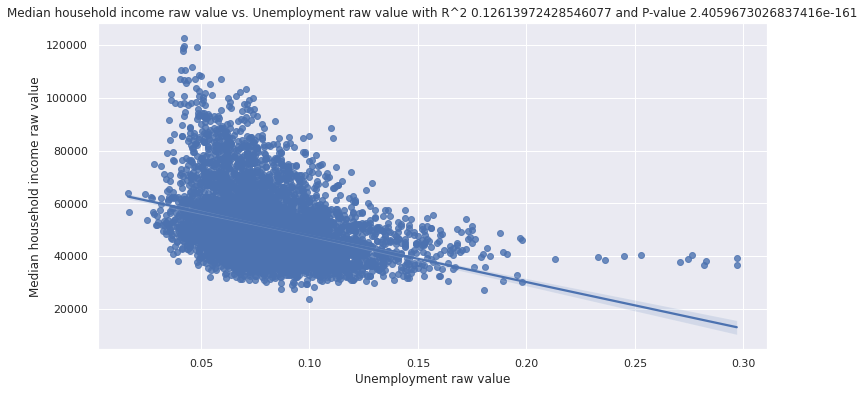

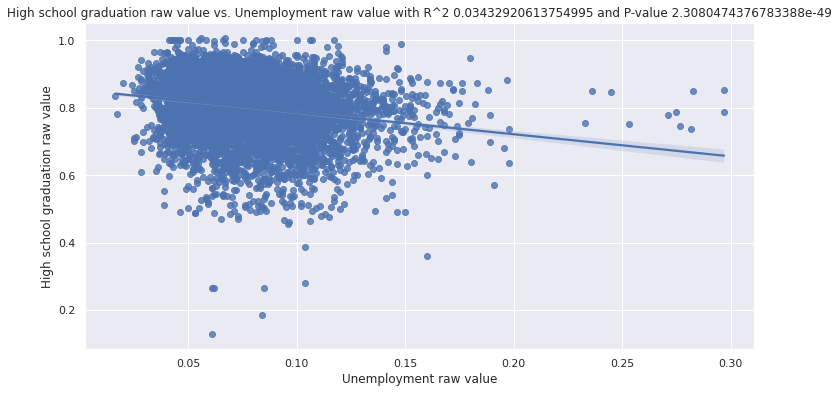

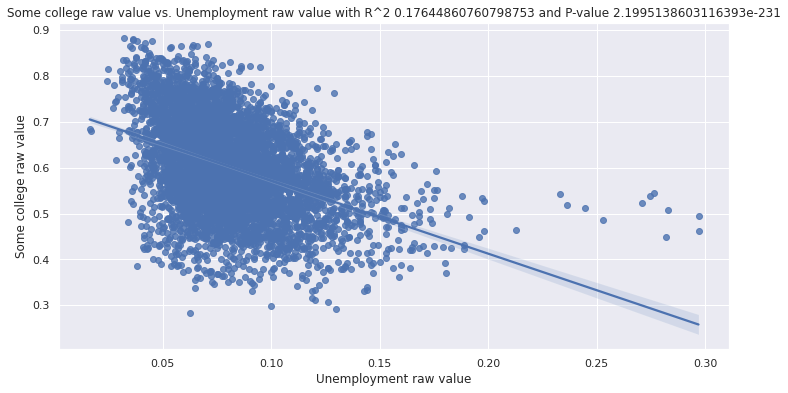

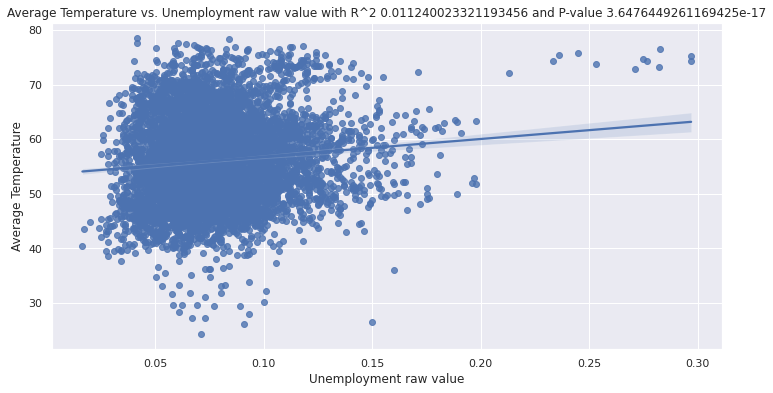

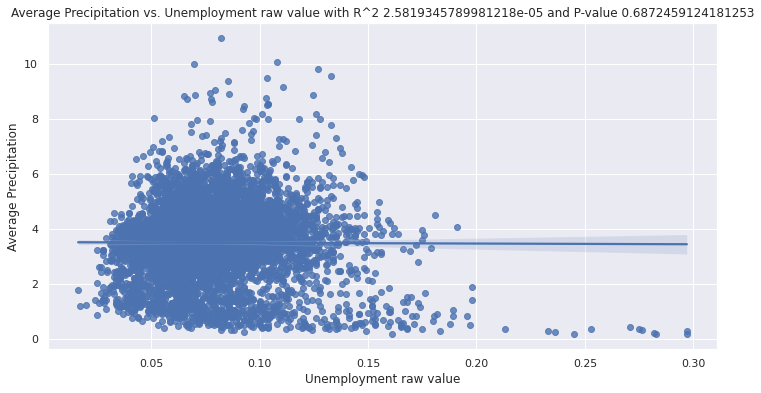

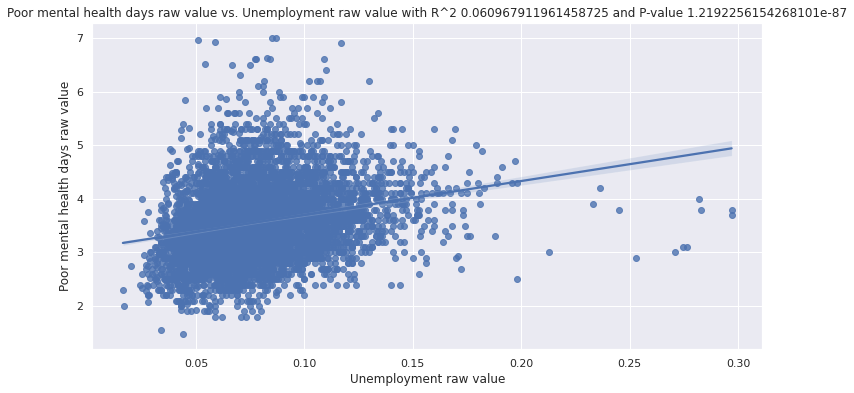

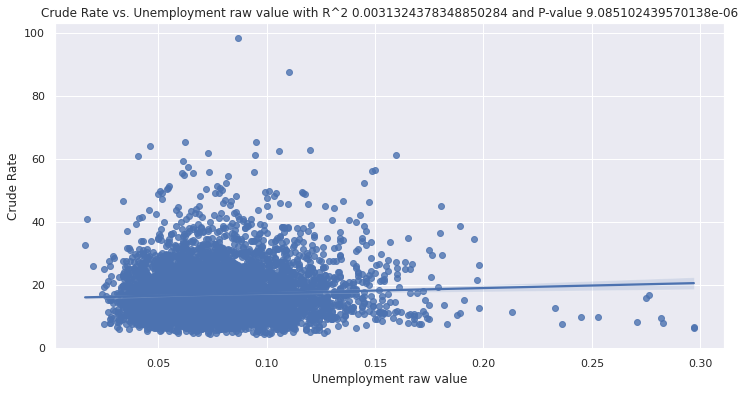

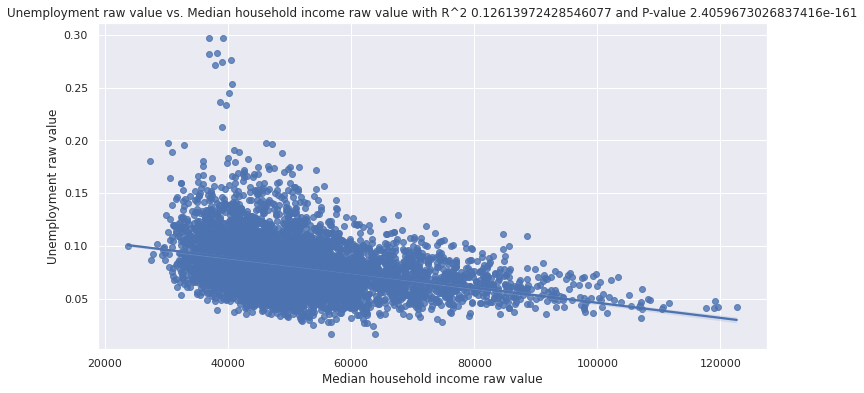

<Figure size 864x432 with 0 Axes>

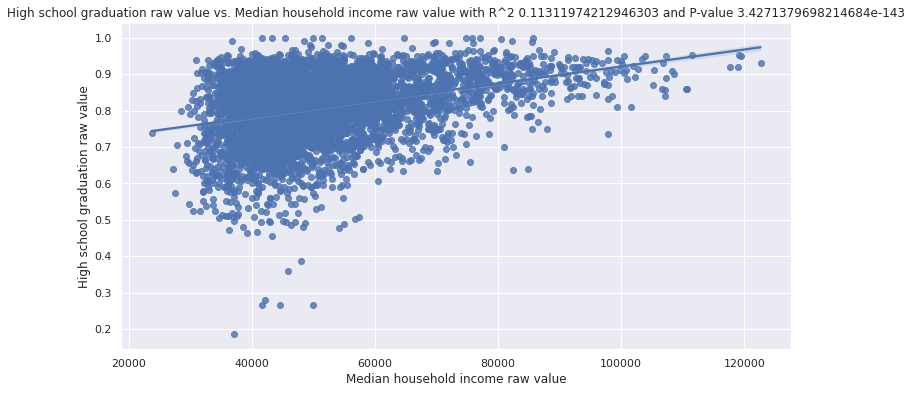

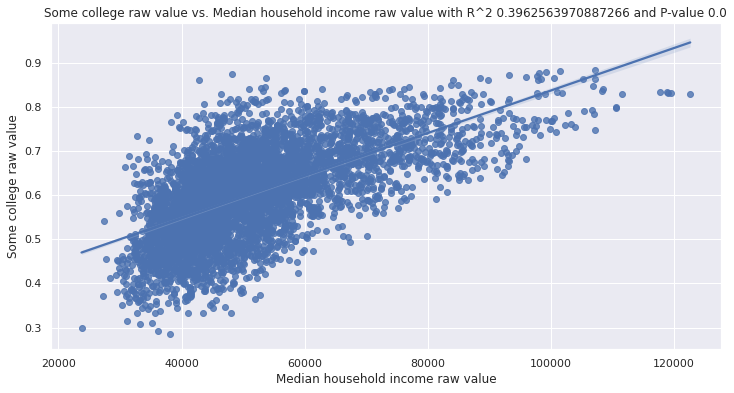

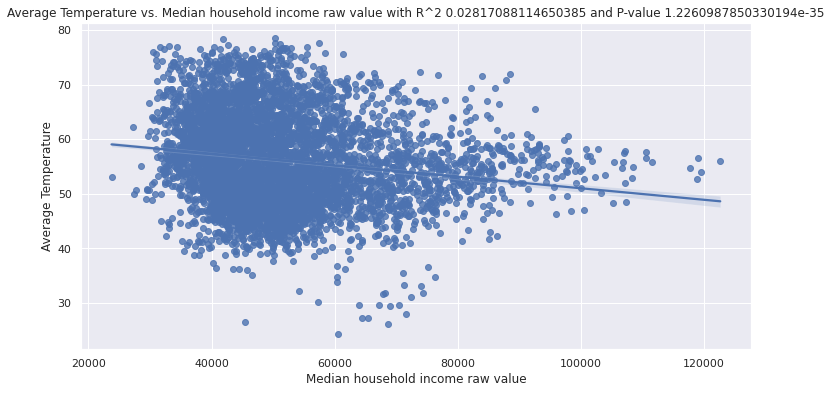

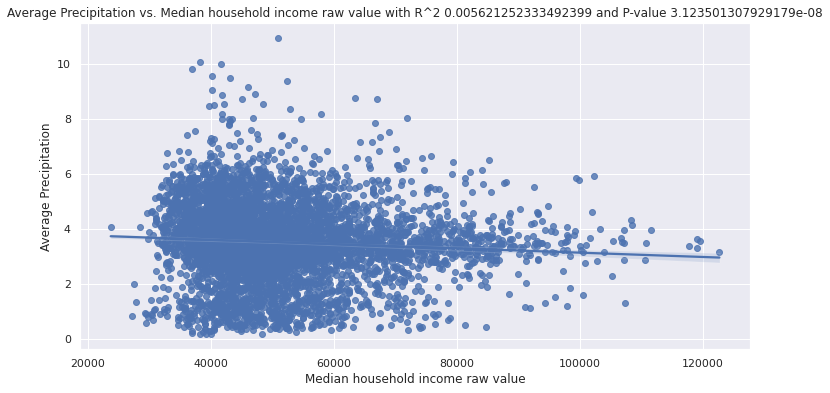

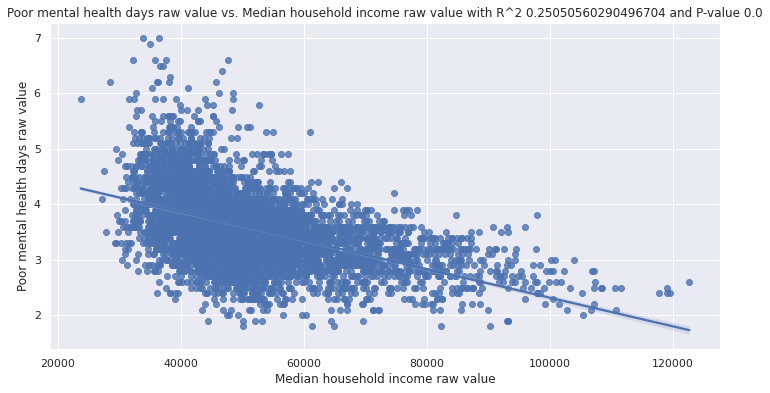

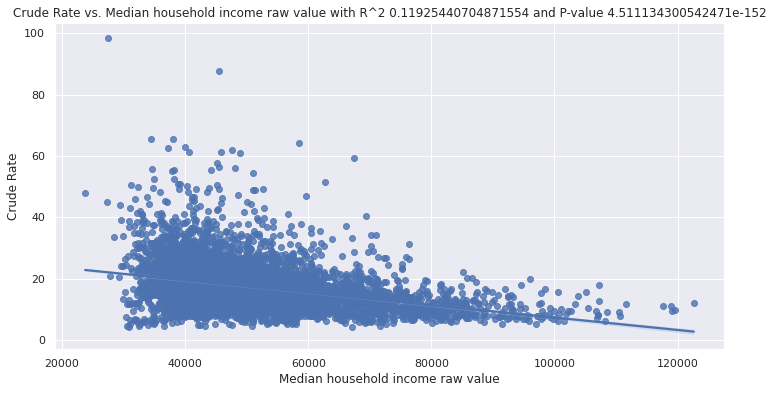

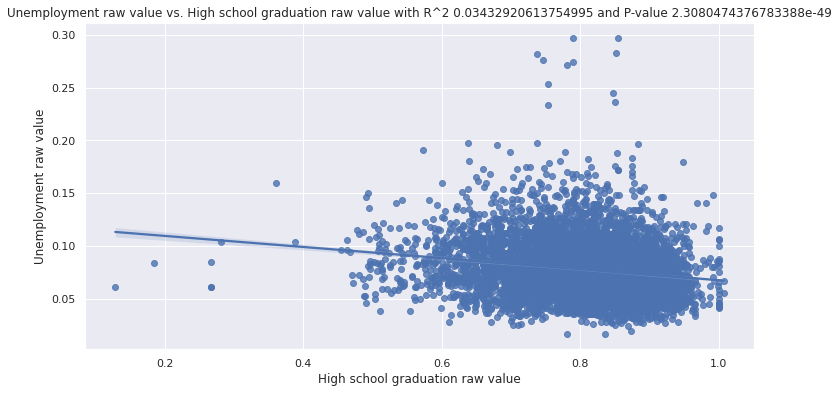

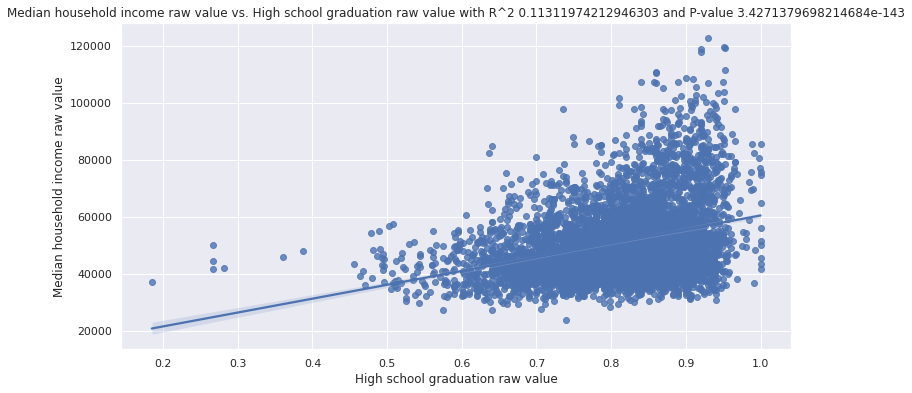

<Figure size 864x432 with 0 Axes>

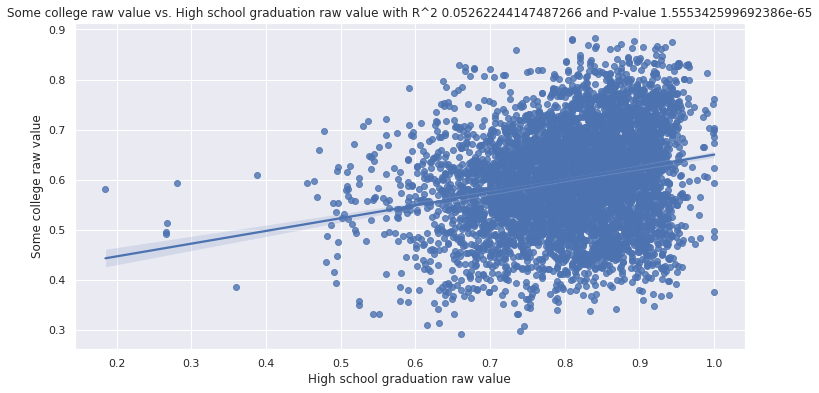

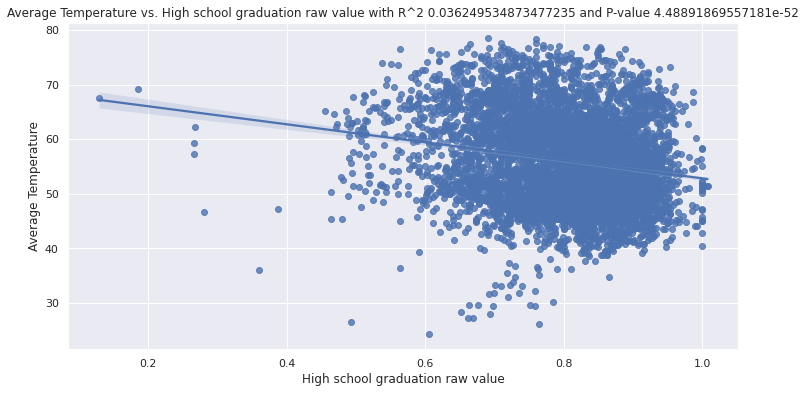

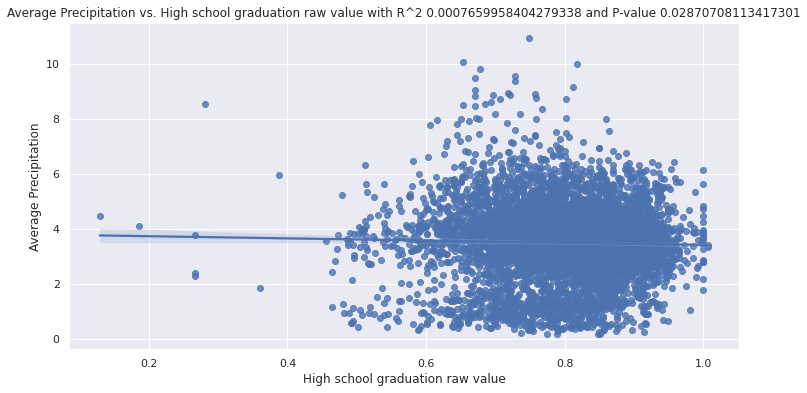

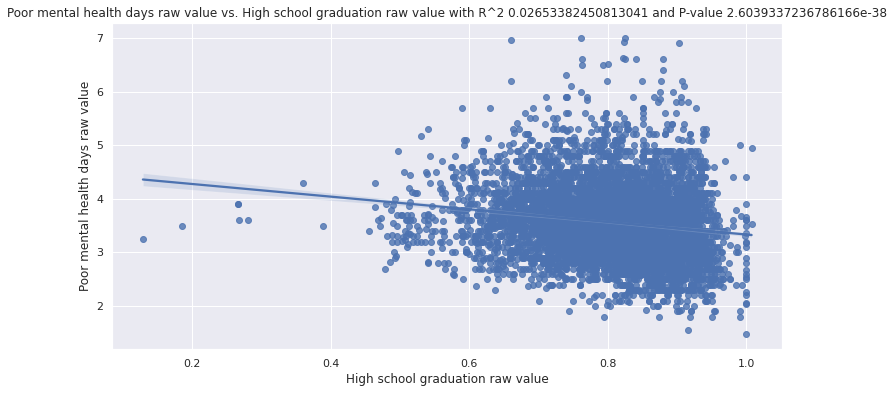

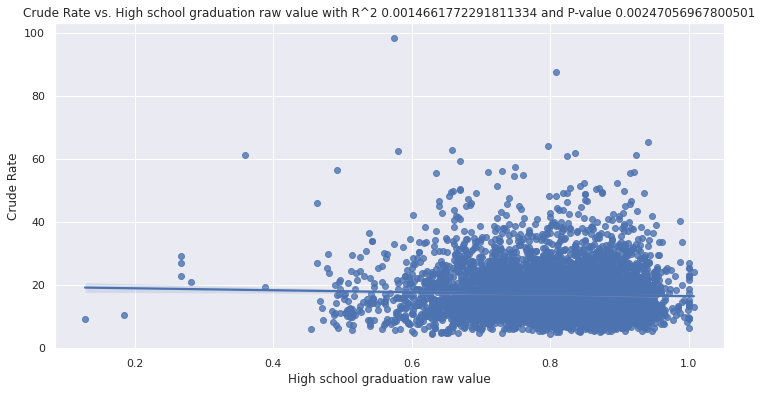

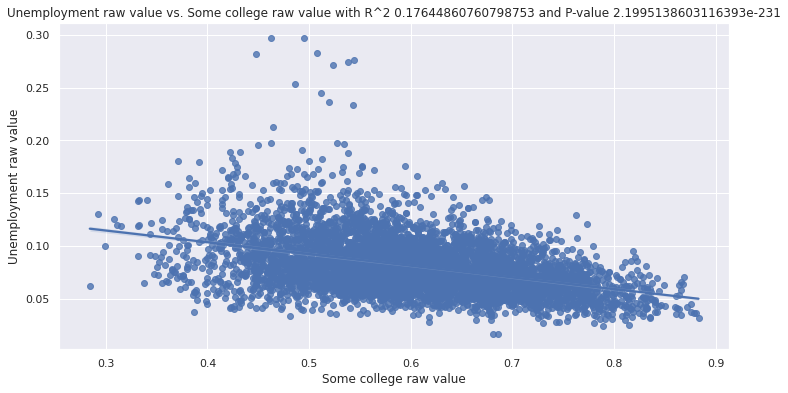

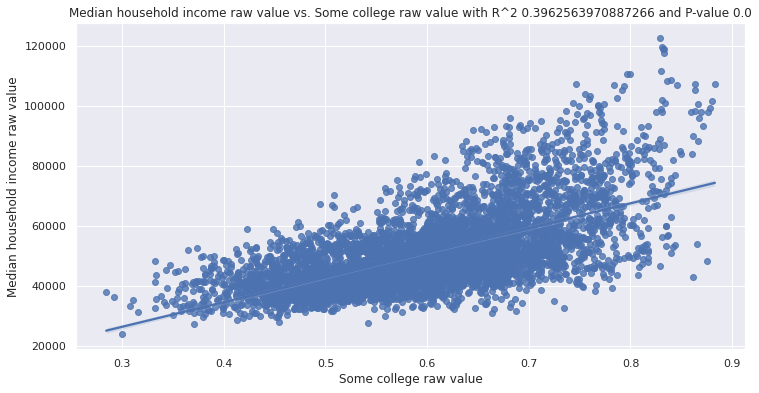

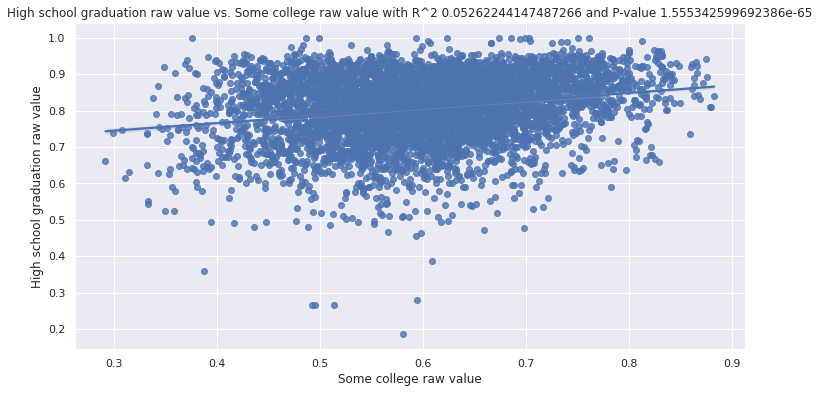

<Figure size 864x432 with 0 Axes>

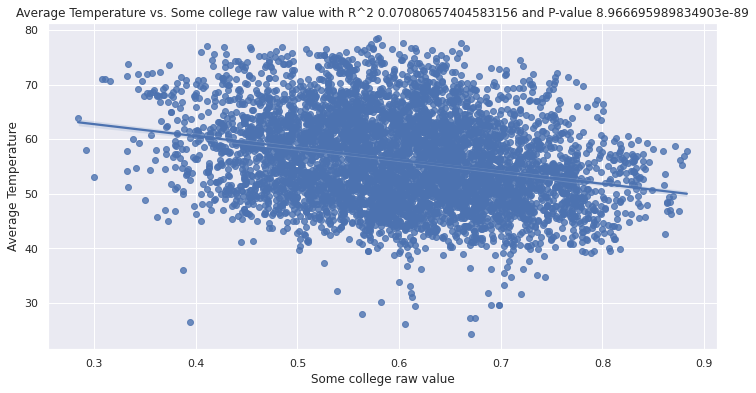

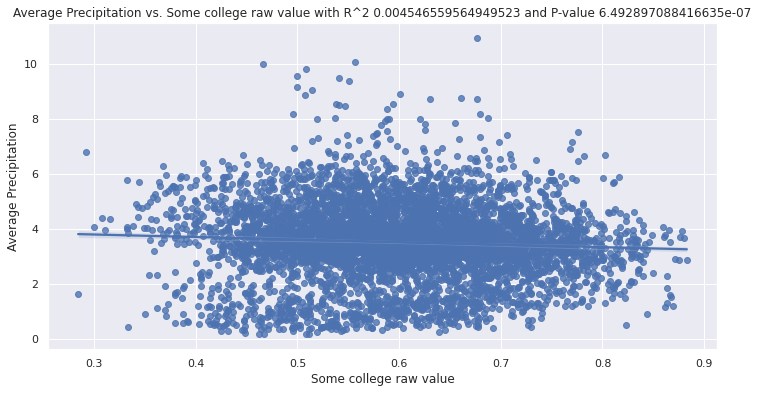

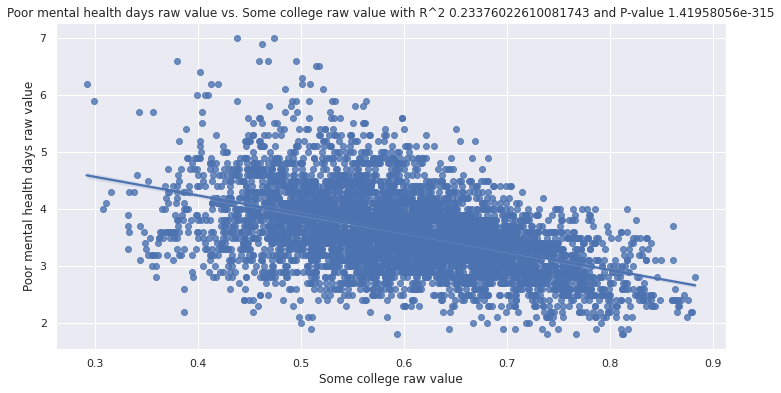

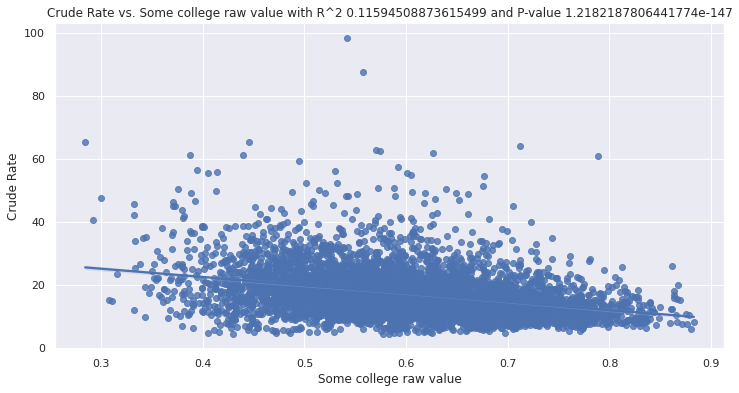

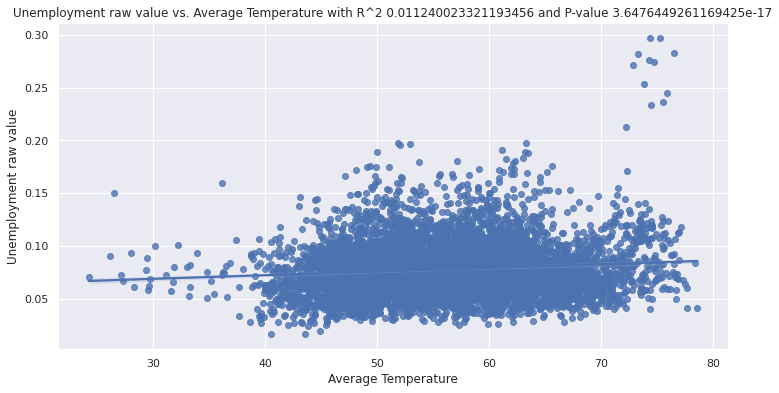

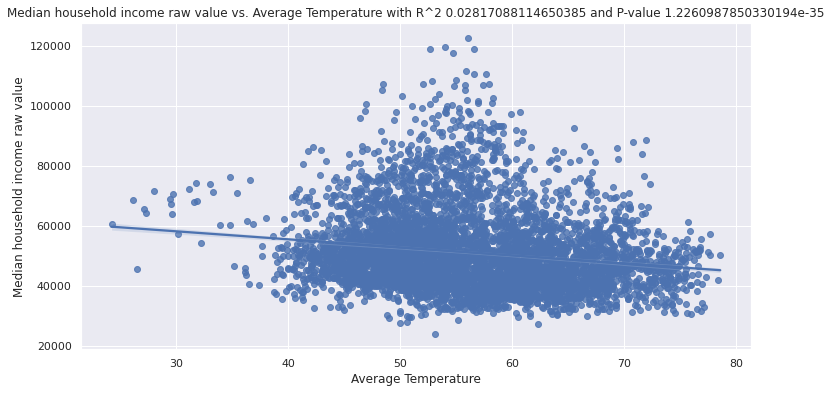

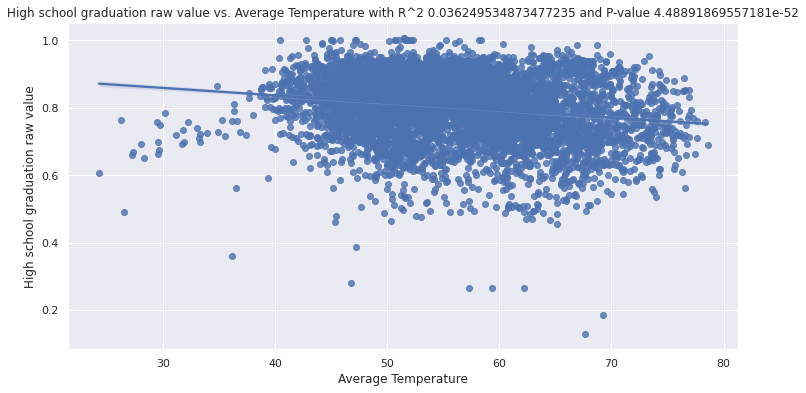

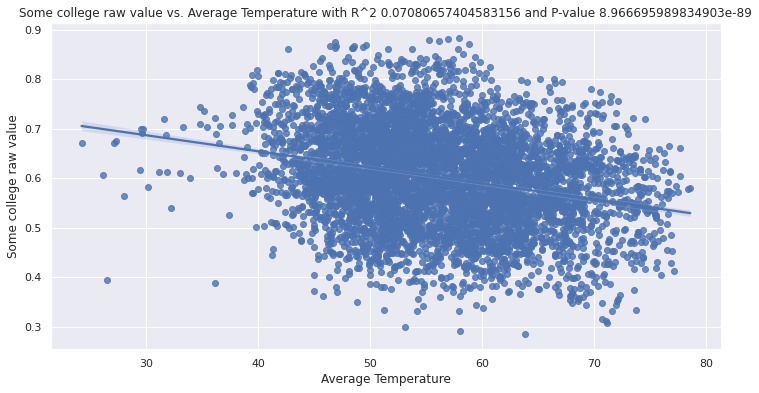

<Figure size 864x432 with 0 Axes>

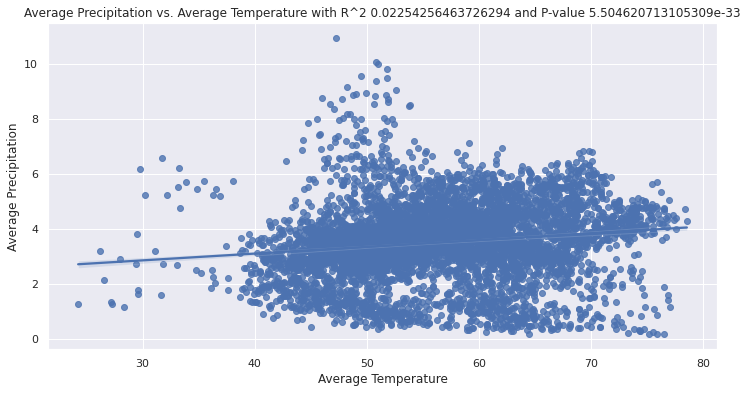

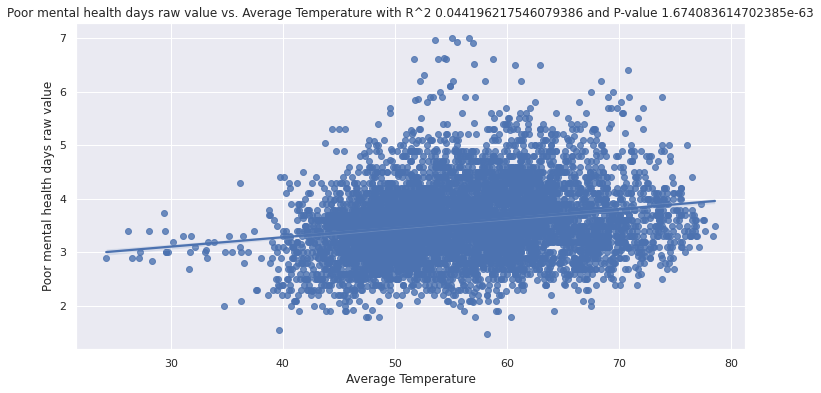

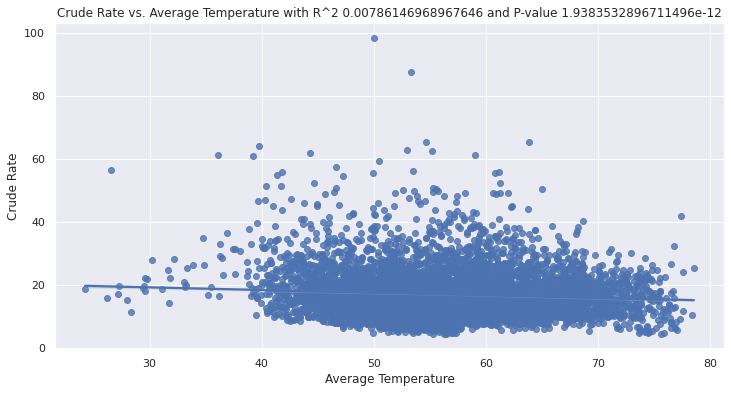

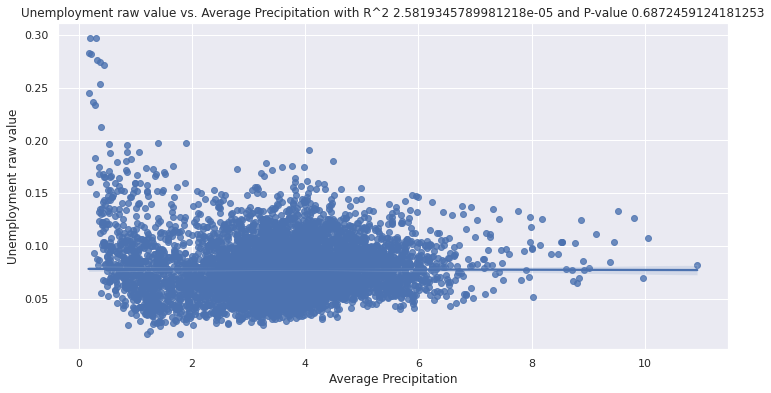

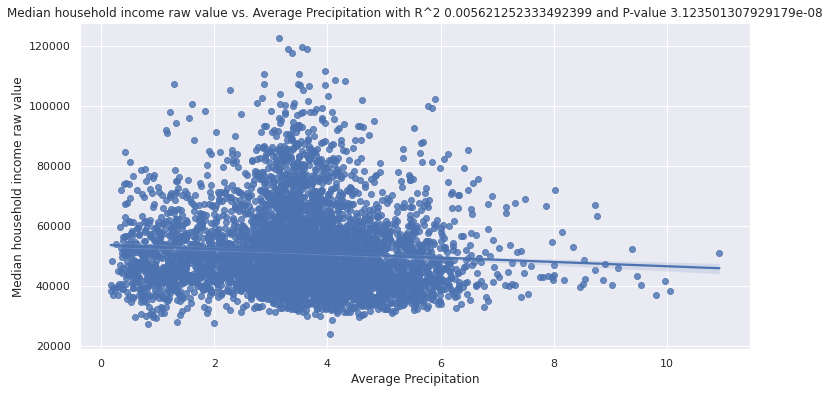

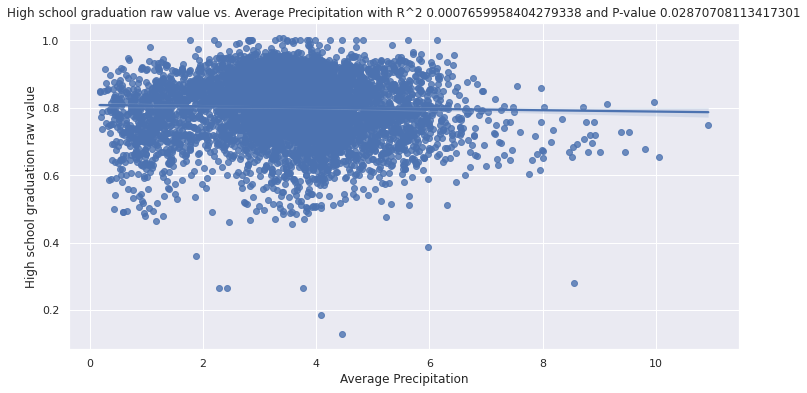

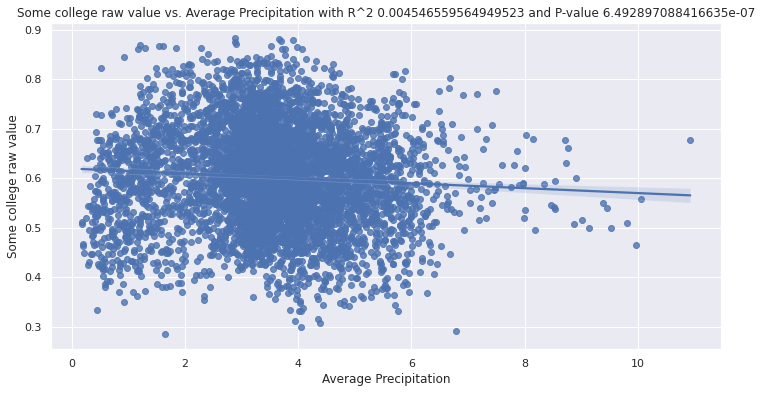

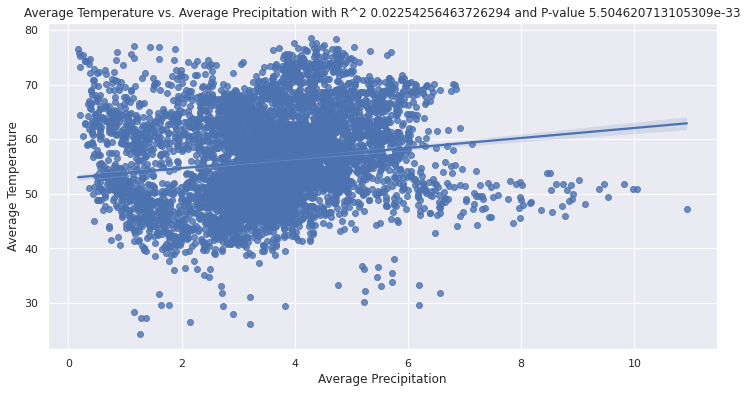

<Figure size 864x432 with 0 Axes>

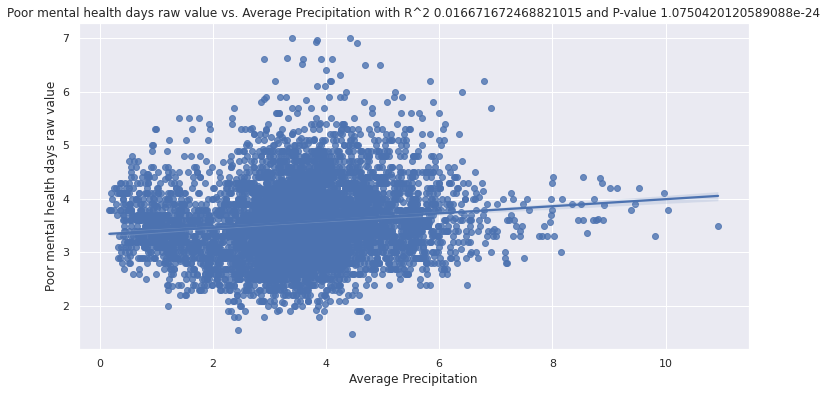

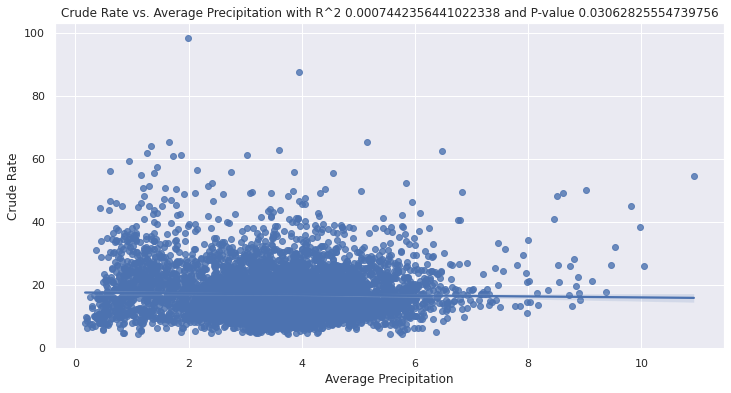

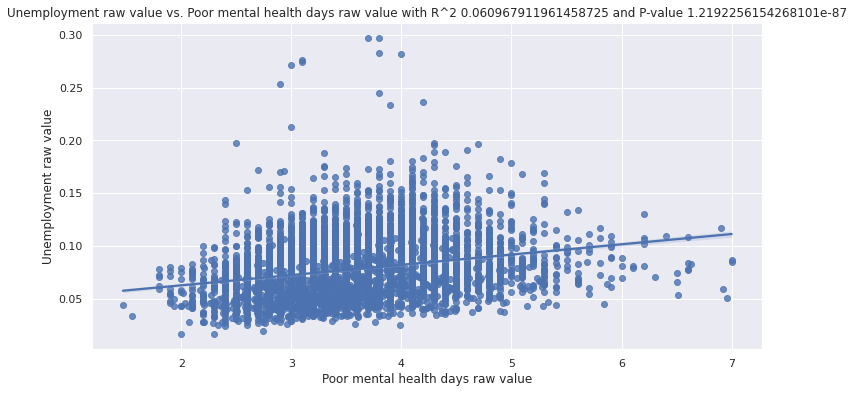

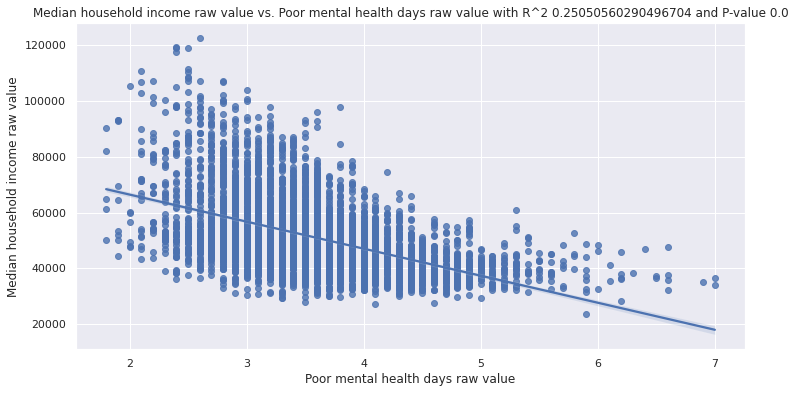

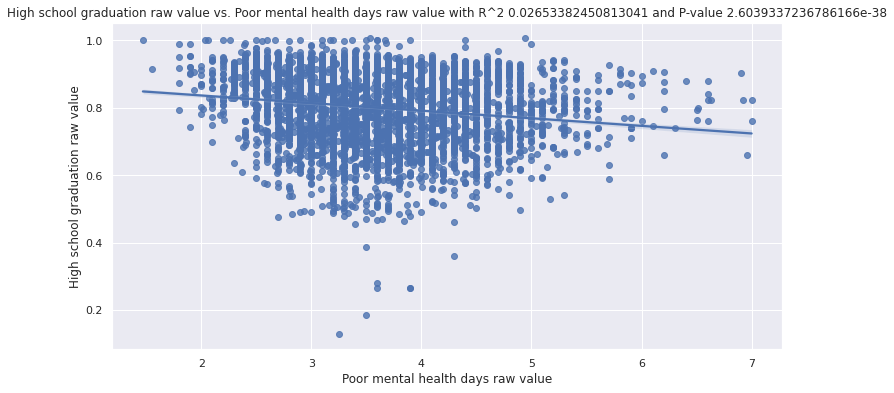

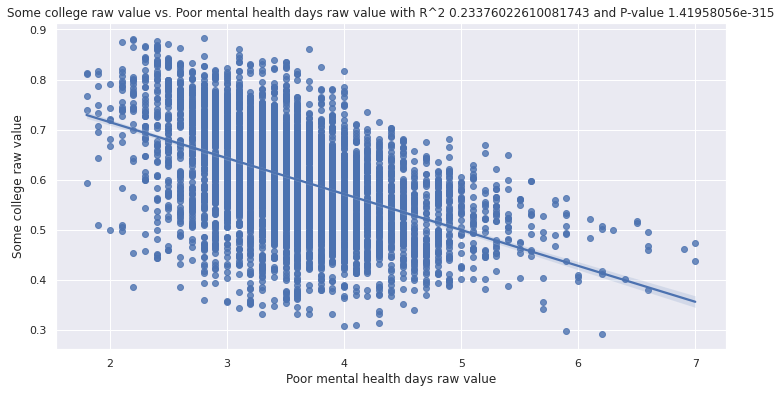

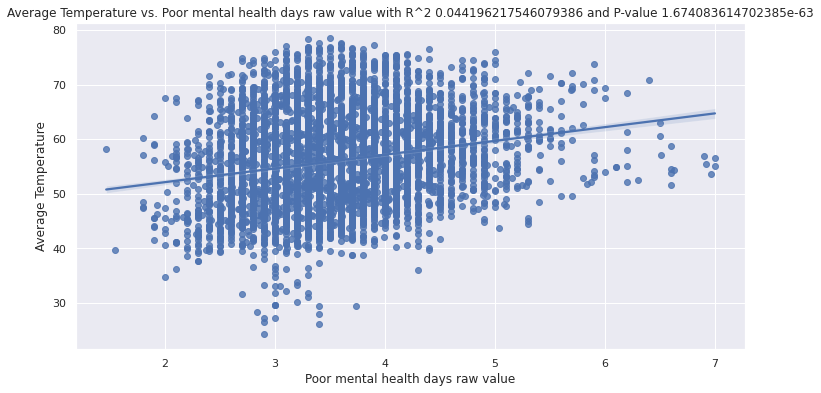

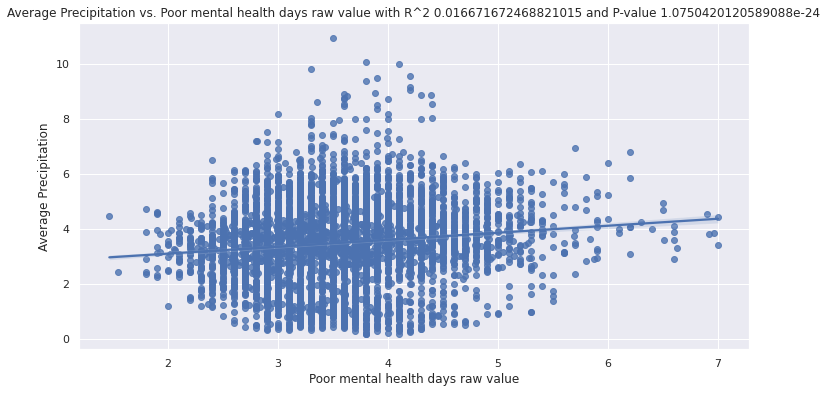

<Figure size 864x432 with 0 Axes>

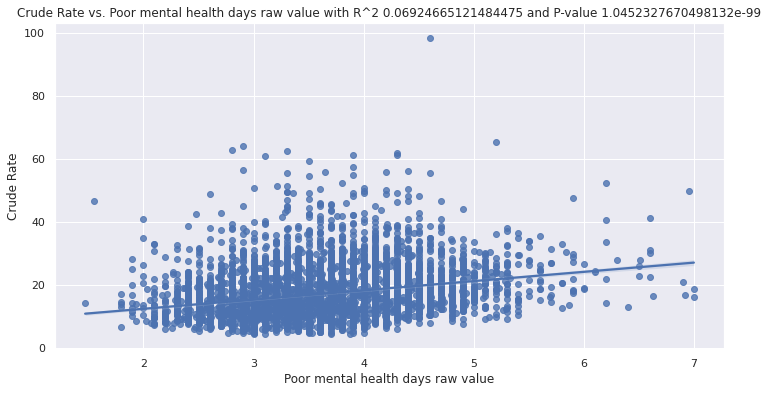

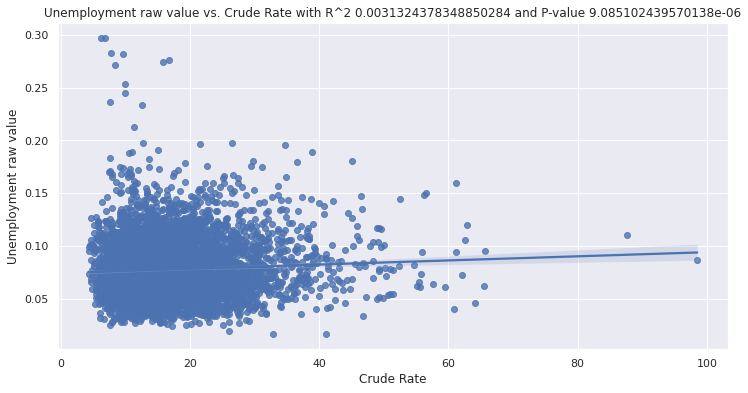

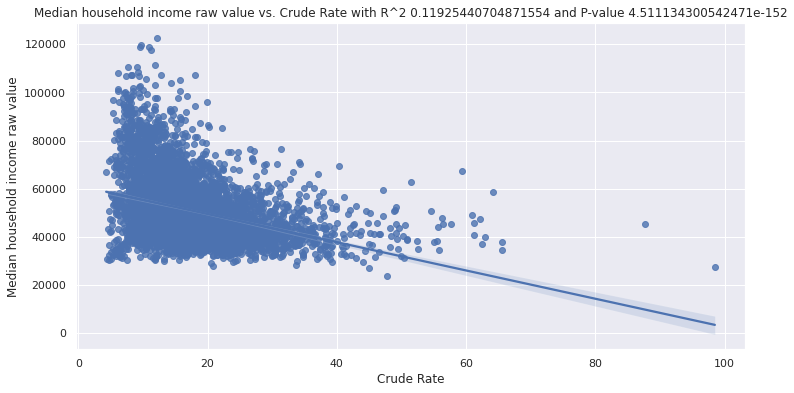

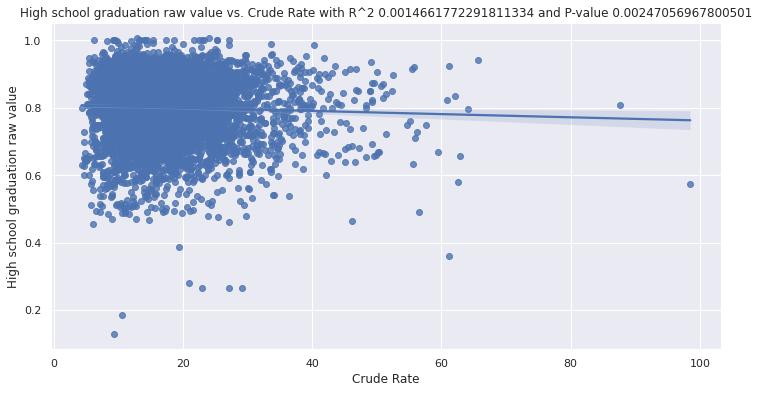

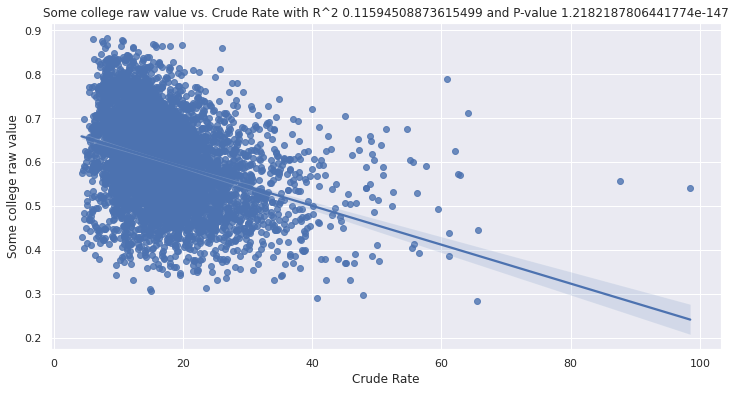

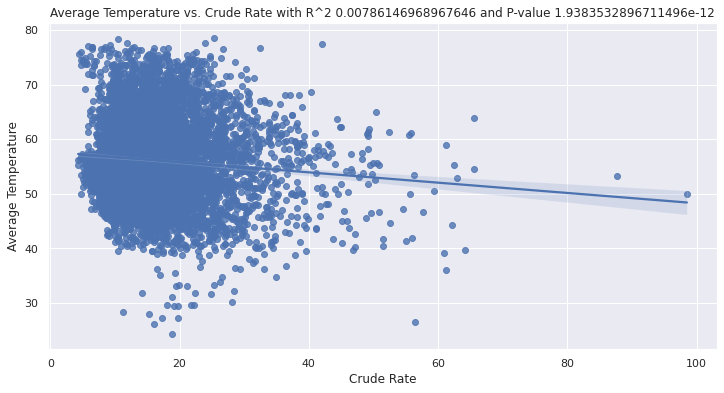

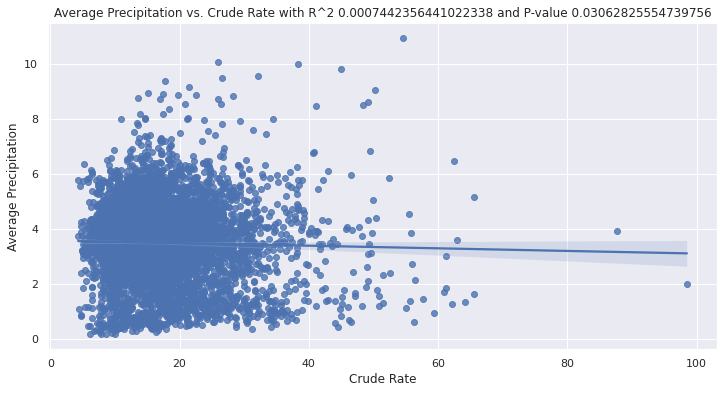

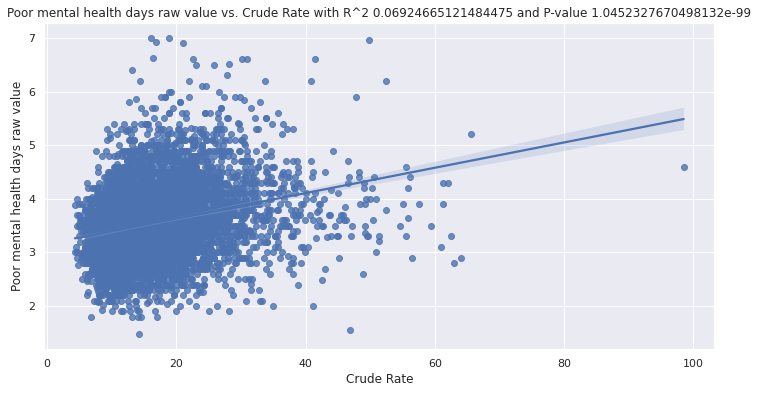

<Figure size 864x432 with 0 Axes>

In [44]:
sns.set_theme()
for i, i_field in enumerate(independent_fields + dependent_fields):
    for j, d_field in enumerate(independent_fields + dependent_fields):
        plt.figure(i * len(dependent_fields) + j, figsize=(12, 6))
        if i_field == d_field:
            continue
        corr_df = filtered_df[[i_field, d_field]].replace([np.inf, -np.inf], np.nan).dropna()
        sns.regplot(x=i_field, y=d_field, data=corr_df)
        r,p = stats.pearsonr(corr_df[i_field], corr_df[d_field])
        plt.title('{} vs. {} with R^2 {} and P-value {}'.format(d_field, i_field, r**2, p))
        plt.show()

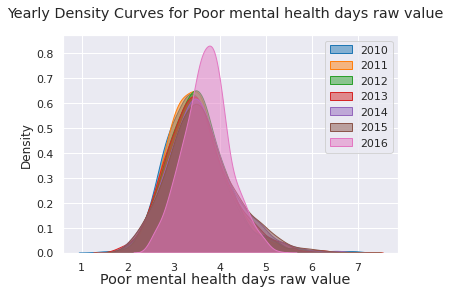

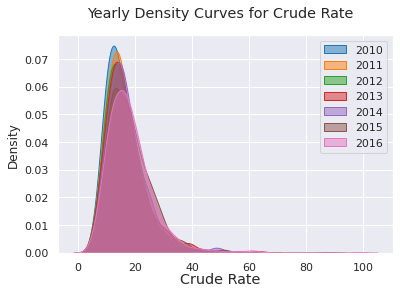

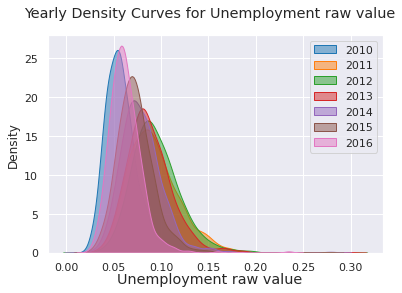

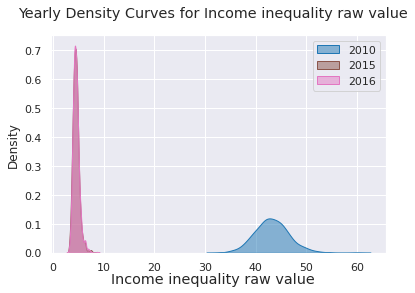

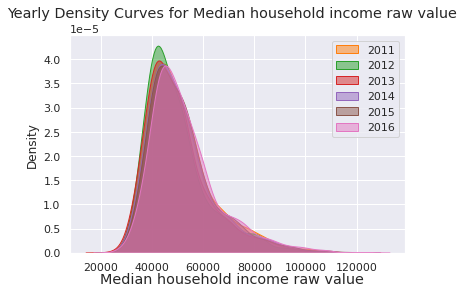

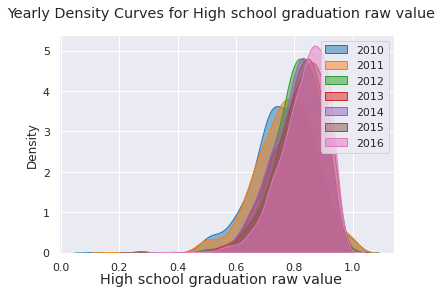

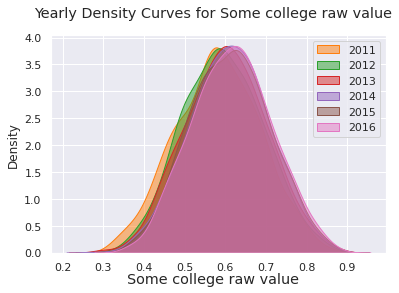

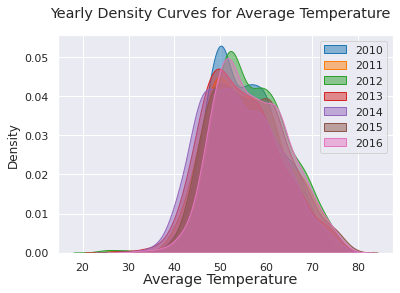

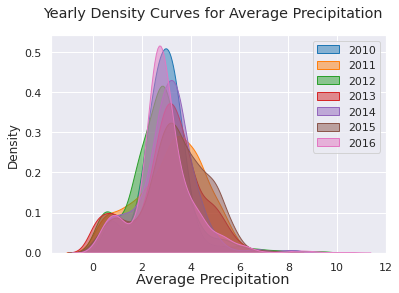

In [5]:
# Plot distributions on a single plot instead of on gridded subplots
years = sorted(filtered_df['Release Year'].unique()) # get unique year
colors = plt.get_cmap('tab10') # Tableau 10 color scheme
for i, field in enumerate(dependent_fields + independent_fields): # create density plots for all dependent fields
    fig, ax = plt.subplots() # create subplot grid
    field_df = filtered_df[['Release Year', field]].dropna().astype(float)
    for j in range(len(years)):
        values = field_df[field_df['Release Year'] == years[j]][field].to_numpy() # get values of dependent variable for current year
        sns.kdeplot(values, shade=True, label=years[j], alpha=0.5, ax=ax, color=colors(j), common_norm=False) # density plot using values and color scheme
        
    ax.legend()
    fig.suptitle('Yearly Density Curves for {}'.format(field))
    fig.supxlabel(field)
    plt.show()